In [1]:
import findspark
findspark.init()
from pyspark import SparkContext
from pyspark.sql import SparkSession
sc = SparkContext(master='local',appName="Linear Regression")
spark = SparkSession(sparkContext=sc)

In [15]:
import numpy as np
import matplotlib.pyplot as plt 

# Gradient Descent in Python

### Generate data

In [34]:
size= 1000
x1 = np.random.rand(size)
x2 = np.random.rand(size)
theta0 = 0
theta1 = 1
theta2 = 4
x = []
for i in range(size):
    x.append(np.array([x1[i],x2[i]]))
e = np.random.rand(size)*0.2
y = theta0 + theta1*x1 + theta2*x2 + e

### Data visualisation

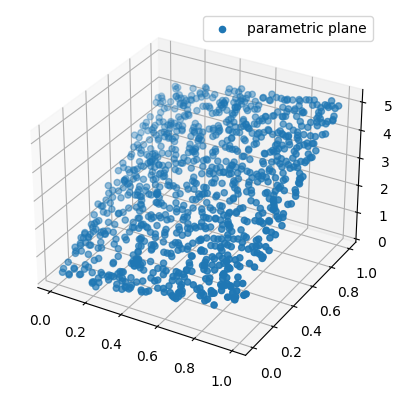

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
 
mpl.rcParams['legend.fontsize'] = 10
 
fig = plt.figure()
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection='3d')

ax.scatter3D(x1, x2, y, label='parametric plane' )
ax.legend()
 
plt.show()

### Gradient Descent Algorithm in Python

In [36]:
learningRate = 1
num_iteration = 100
m_current=np.zeros(2)
n = float(size)
# Let's start with main iterative part of gradient descent algorithm 
for i in range(num_iteration):
    # Calculate the prediction with current regression coefficients. 
    cost = 0
    m_gradient = 0
    for j in range(size):
        y_prediction = np.dot(m_current,x[j])
        # We compute costs just for monitoring 
        cost += ( y[j] - y_prediction)**2
        # calculate gradients.
        m_gradient += x[j] * (y[j] - y_prediction)
    m_gradient = (-1.0/n)* m_gradient
    # update the weights - Regression Coefficients 
    m_current = m_current - learningRate * m_gradient
    print(i , "m=", m_current, " Cost=", cost/n)

0 m= [1.42461009 1.71829827]  Cost= 8.573113697556426
1 m= [1.92536274 2.46289387]  Cost= 1.598236237118023
2 m= [2.06490041 2.8157948 ]  Cost= 0.46041808468256507
3 m= [2.06605948 3.00842206]  Cost= 0.2482681831006711
4 m= [2.01685774 3.1330239 ]  Cost= 0.18721689315411127
5 m= [1.95184336 3.2265817 ]  Cost= 0.15441417003754757
6 m= [1.8843765  3.30411224]  Cost= 0.12979433451055145
7 m= [1.81943804 3.37188666]  Cost= 0.10959579325972281
8 m= [1.75871041 3.43267914]  Cost= 0.09272168246374378
9 m= [1.70259175 3.48785205]  Cost= 0.07857605941392459
10 m= [1.65099315 3.53818546]  Cost= 0.0667100206067114
11 m= [1.60365318 3.58420826]  Cost= 0.05675499201878981
12 m= [1.56026093 3.62633122]  Cost= 0.048403016330308815
13 m= [1.52050327 3.66490132]  Cost= 0.041395924617992574
14 m= [1.48408214 3.70022481]  Cost= 0.035517151044801694
15 m= [1.45072006 3.73257756]  Cost= 0.030585007241174755
16 m= [1.42016111 3.76221047]  Cost= 0.026447061989510384
17 m= [1.39217015 3.78935258]  Cost= 0.022

# Gradient Descent in PySpark

### Generate data
- Data range infulence the learning rate (Try to change scale_x)
- Intercept calculation (adding 1 to the input data)

In [39]:
#Data set parameters
size  = 100 # Size of input data
scale_x = 1 # Scaling of the input data (default range is [0,1])
d = 3 # Dimensionality of the input data
theta = [-1,1,2] # The parameters of the model
theta0 = 5 # The intercept value
error_rate = 0.1

# Create random input varaiables
x = np.random.rand(size,d)
# Scale the input space
x = x*scale_x
# Generate errors for each sample
e = np.random.rand(size)*scale_x*error_rate
# Create the data
data = []
for i in range(size):
    # Calculate the target variable
    y = np.dot(theta,x[i]) + theta0 +e[i]
    # Create a tuple (target_variable, array[input_varaiables]) 
    data.append((y,x[i]))


myRDD = sc.parallelize(data)
# Needed for intercept calculation
# myRDD= myRDD.map(lambda x: (x[0],np.append(x[1],1 )))
myRDD.cache()

ParallelCollectionRDD[350] at readRDDFromFile at PythonRDD.scala:274

## Gradient Descent Algorithm
### Linear Regression Model (No Intercept)

The linear regression model without an intercept term can be represented as:

$$
y = \theta_1x_1 + \theta_2x_2 + \theta_3x_3
$$

Here's a breakdown of the variables:
- $y$ is the dependent variable or the target variable we want to predict.
- $x_1$, $x_2$, and $x_3$ are the three input variables.
- $\theta_1$, $\theta_2$, and $\theta_3$ are the coefficients of the model.

### Cost Function

To estimate the coefficients, we need a cost function that measures the error between the actual values and the predicted values. For linear regression, we commonly use the mean squared error (MSE) as the cost function. The MSE is defined as:

$$
L(\theta_1, \theta_2, \theta_3) = \frac{1}{2n} \sum_{i=1}^{n} (y_i - (\theta_1x_{1i} + \theta_2x_{2i} + \theta_3x_{3i}))^2
$$

Here, $n$ represents the number of data points in our dataset, and $y_i$, $x_{1i}$, $x_{2i}$, and $x_{3i}$ are the values of the target variable and input variables for the i-th data point.

### Gradient Descent

Gradient descent is an iterative optimization algorithm used to minimize the cost function and find the optimal coefficients. Here's an overview of the steps involved:

1. Initialize the coefficients $\theta_1$, $\theta_2$, and $\theta_3$ with random values or zeros.
2. Set the learning rate $\alpha$, which controls the step size in each iteration.
3. Repeat the following steps until convergence:
- Calculate the gradient of the cost function with respect to each coefficient:
$$
     \frac{\partial L}{\partial \theta_j} = \frac{-1}{n} \sum_{i=1}^{n} x_{ji}(y_i - (\theta_1x_{1i} + \theta_2x_{2i} + \theta_3x_{3i}))
$$

- Update the coefficients simultaneously:
$$
\theta_j = \theta_j - \alpha \frac{\partial L}{\partial \theta_j}
$$
## Interpretation of Coefficients

Once gradient descent converges and finds the optimal coefficients, we can interpret them as follows:

- $\theta_1$ represents the change in the dependent variable for a one-unit increase in $x_1$, assuming $x_2$ and $x_3$ are held constant.
- $\theta_2$ represents the change in the dependent variable for a one-unit increase in $x_2$, assuming $x_1$ and $x_3$ are held constant.
- $\theta_3$ represents the change in the dependent variable for a one-unit increase in $x_3$, assuming $x_1$ and $x_2$ are held constant.

In [40]:
myRDD.take(3)

[(5.275662154865089, array([0.86254406, 0.52102644, 0.27421204])),
 (7.113733008915268, array([0.26117788, 0.46963742, 0.91385914])),
 (6.919362674568105, array([0.58472681, 0.76763563, 0.85065762]))]

In [41]:
learningRate = 1
num_iteration = 30

# Calculate the dimensionality of the inpit data
d_input = len(myRDD.first()[1])
theta = np.zeros(d_input)
print(f"Input dimensionalyty is {d_input} and we start wiht {theta} as parameters ")

# Let's start with main iterative part of gradient descent algorithm 
for i in range(num_iteration):
    gradientAndCost=myRDD.map(lambda x: (x[1], (x[0] - np.dot(x[1] , theta) )))\
                           .map(lambda x: (x[0]*x[1], x[1]**2 ))\
                           .reduce(lambda x, y: (x[0] +y[0], x[1]+y[1] ))
    cost= gradientAndCost[1]/(2*size)
    gradient=(-1/float(size))* gradientAndCost[0]
    theta = theta - learningRate * gradient
    print(f"{i} Cost={cost:.5f} theta={theta}")

Input dimensionalyty is 3 and we start wiht [0. 0. 0.] as parameters 
0 Cost=19.16876 theta=[2.92303853 3.05743029 3.56765414]
1 Cost=1.72076 theta=[3.19817167 3.49162391 4.16862522]
2 Cost=1.34962 theta=[3.1182972  3.5633299  4.34791072]
3 Cost=1.31231 theta=[2.99977493 3.58531034 4.45894869]
4 Cost=1.28679 theta=[2.88544481 3.60069237 4.5516782 ]
5 Cost=1.26590 theta=[2.78037126 3.61530332 4.63392066]
6 Cost=1.24872 theta=[2.68446954 3.6298301  4.70757408]
7 Cost=1.23457 theta=[2.59701474 3.64426815 4.77363308]
8 Cost=1.22291 theta=[2.51725916 3.65853466 4.83289233]
9 Cost=1.21330 theta=[2.44451156 3.67255113 4.88605157]
10 Cost=1.20536 theta=[2.37814252 3.68625274 4.93373705]
11 Cost=1.19881 theta=[2.31758017 3.69958785 4.97651062]
12 Cost=1.19339 theta=[2.26230497 3.71251637 5.01487659]
13 Cost=1.18891 theta=[2.21184488 3.72500808 5.04928758]
14 Cost=1.18520 theta=[2.16577092 3.73704125 5.08014987]
15 Cost=1.18212 theta=[2.12369316 3.74860134 5.10782809]
16 Cost=1.17957 theta=[2.08